# Desafio 3

#### Exercício 1: Acesse a [API da NBA](https://github.com/swar/nba_api) para ter acesso às informações dos times e jogadores. Crie um dataframe dos clubes e dos jogadores e escolha o jogador *Kobe Bryant* para fazer um estudo. Calcule quantos arremeços ele realizou nos últimos segundos de cada período jogado, em todos os seus jogos.

In [15]:
#pip install nba_api

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nba_api.stats.static import players
from nba_api.stats.static import teams

In [72]:
player_dict = players.get_players()
teams = teams.get_teams()

In [73]:
# Configurando o pandas para mostrar todas as colunas
pd.set_option('display.max_columns', 500)

In [74]:
#Criando df de jogadores
player = pd.DataFrame(player_dict)

In [75]:
player.loc[player['first_name'] == 'Kobe']

,id,full_name,first_name,last_name,is_active
534,977,Kobe Bryant,Kobe,Bryant,False


In [76]:
#Criando df de times
teams = pd.DataFrame(teams)

In [77]:
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.library.parameters import SeasonAll

### Breve estudo do jogador Kobe Bryant

In [78]:
kobe = playergamelog.PlayerGameLog(player_id='977',season = SeasonAll.all)

In [79]:
#Criando df com dados do jogador Kobe Bryant
kobe = kobe.get_data_frames()[0]

In [80]:
kobe.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22015,977,0021501228,"APR 13, 2016",LAL vs. UTA,W,42,22,50,0.440,6,21,0.286,10,12,0.833,0,4,4,4,1,1,2,1,60,7,1
1,22015,977,0021501209,"APR 11, 2016",LAL @ OKC,L,19,4,12,0.333,3,9,0.333,2,2,1.000,0,1,1,0,1,0,2,2,13,-24,1
2,22015,977,0021501195,"APR 10, 2016",LAL @ HOU,L,27,10,22,0.455,4,11,0.364,11,11,1.000,0,2,2,1,2,0,4,1,35,-10,1
3,22015,977,0021501184,"APR 08, 2016",LAL @ NOP,L,22,4,15,0.267,3,9,0.333,3,3,1.000,0,3,3,4,1,0,2,0,14,-16,1
4,22015,977,0021501172,"APR 06, 2016",LAL vs. LAC,L,28,6,19,0.316,1,6,0.167,4,4,1.000,0,3,3,1,1,0,1,1,17,-15,1


## Dicionário

MIN = Número total de minutos jogados

FGM = Número total de cestas feitas.

FGA = Número total de cestas tentadas

FG_PCT = Porcentagem total de cestas.

FG3M = Total de cestas de três pontos.

FG3A = Total de cestas de três pontos tentados.

FG3_PCT = Porcentagem total de cestas de três pontos.

FTM = Total de lances livres feitos

FTA = Total de tentativas de lances livres

FT_PCT = Porcentagem total de lances livres

OREB = Total de rebotes ofensivos

DREB = Total de rebotes defensivos

REB = Total de rebotes

AST = Total de assistências

STL = Total de roubos

BLK = Total de arremessos bloqueados

TOV = Perda de bola

PF = Total de faltas pessoais

PTS = Total de pontos marcados

PLUS_MINUS = Total mais menos ***(Exemplo: Russell Westbrook teve um +/- de +15 em um jogo do Oklahoma City Thunder. Isso que dizer que, enquanto o armador esteve em quadra, o Thunder venceu o adversário por 15 pontos de diferença. No mesmo jogo, Stevens Adams, também de OKC, teve -2, ou seja, o Thunder perdeu por dois pontos enquanto ele esteve atuando).***

VIDEO_AVAILABLE = Video Disponível


In [81]:
kobe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEASON_ID        1346 non-null   object 
 1   Player_ID        1346 non-null   int64  
 2   Game_ID          1346 non-null   object 
 3   GAME_DATE        1346 non-null   object 
 4   MATCHUP          1346 non-null   object 
 5   WL               1346 non-null   object 
 6   MIN              1346 non-null   int64  
 7   FGM              1346 non-null   int64  
 8   FGA              1346 non-null   int64  
 9   FG_PCT           1346 non-null   float64
 10  FG3M             1346 non-null   int64  
 11  FG3A             1346 non-null   int64  
 12  FG3_PCT          1346 non-null   float64
 13  FTM              1346 non-null   int64  
 14  FTA              1346 non-null   int64  
 15  FT_PCT           1346 non-null   float64
 16  OREB             1346 non-null   int64  
 17  DREB          

In [82]:
cols = ['MIN','FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','FTM','FTA',
        'FT_PCT','OREB','DREB','REB','AST','STL','BLK','TOV','PF','PTS','PLUS_MINUS']

In [83]:
#Criando uma coluna ano
kobe['YEAR'] = kobe['SEASON_ID'].apply(lambda x: x[-4:])

In [84]:
kobe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEASON_ID        1346 non-null   object 
 1   Player_ID        1346 non-null   int64  
 2   Game_ID          1346 non-null   object 
 3   GAME_DATE        1346 non-null   object 
 4   MATCHUP          1346 non-null   object 
 5   WL               1346 non-null   object 
 6   MIN              1346 non-null   int64  
 7   FGM              1346 non-null   int64  
 8   FGA              1346 non-null   int64  
 9   FG_PCT           1346 non-null   float64
 10  FG3M             1346 non-null   int64  
 11  FG3A             1346 non-null   int64  
 12  FG3_PCT          1346 non-null   float64
 13  FTM              1346 non-null   int64  
 14  FTA              1346 non-null   int64  
 15  FT_PCT           1346 non-null   float64
 16  OREB             1346 non-null   int64  
 17  DREB          

In [85]:
#Convertendo a coluna YEAR para numérico para plotar os gráficos
kobe['YEAR'] = pd.to_numeric(kobe['YEAR'])

In [86]:
kobe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEASON_ID        1346 non-null   object 
 1   Player_ID        1346 non-null   int64  
 2   Game_ID          1346 non-null   object 
 3   GAME_DATE        1346 non-null   object 
 4   MATCHUP          1346 non-null   object 
 5   WL               1346 non-null   object 
 6   MIN              1346 non-null   int64  
 7   FGM              1346 non-null   int64  
 8   FGA              1346 non-null   int64  
 9   FG_PCT           1346 non-null   float64
 10  FG3M             1346 non-null   int64  
 11  FG3A             1346 non-null   int64  
 12  FG3_PCT          1346 non-null   float64
 13  FTM              1346 non-null   int64  
 14  FTA              1346 non-null   int64  
 15  FT_PCT           1346 non-null   float64
 16  OREB             1346 non-null   int64  
 17  DREB          

In [87]:
#Tabela com as médias dos dados do Kobe Bryant para cada temporada
media = pd.DataFrame(pd.pivot_table(kobe[['SEASON_ID','YEAR','MIN','FGM','FGA','FG_PCT','FG3M','FG3A',
                             'FG3_PCT','FTM','FTA','FT_PCT','OREB','DREB','REB','AST','STL',
                             'BLK','TOV','PF','PTS','PLUS_MINUS']], index = 'SEASON_ID'))
media

,AST,BLK,DREB,FG3A,FG3M,FG3_PCT,FGA,FGM,FG_PCT,FTA,FTM,FT_PCT,MIN,OREB,PF,PLUS_MINUS,PTS,REB,STL,TOV,YEAR
SEASON_ID,,,,,,,,,,,,,,,,,,,,,
21996,1.281690,0.323944,1.197183,1.915493,0.718310,0.235901,5.943662,2.478873,0.352817,2.338028,1.915493,0.483775,15.521127,0.661972,1.436620,0.845070,7.591549,1.859155,0.690141,1.577465,1996
21997,2.518987,0.506329,2.063291,2.784810,0.949367,0.314494,11.556962,4.949367,0.410873,5.784810,4.594937,0.700481,26.063291,1.000000,2.278481,3.367089,15.443038,3.063291,0.936709,1.987342,1997
21998,3.800000,1.000000,4.220000,2.020000,0.540000,0.178000,15.580000,7.240000,0.471860,5.840000,4.900000,0.821440,37.960000,1.060000,3.060000,1.820000,19.920000,5.280000,1.440000,3.140000,1998
21999,4.893939,0.939394,4.666667,2.181818,0.696970,0.241121,17.924242,8.393939,0.470061,6.106061,5.015152,0.824106,38.212121,1.636364,3.333333,8.045455,22.500000,6.303030,1.606061,2.757576,1999
22000,4.970588,0.632353,4.338235,2.941176,0.897059,0.296603,22.205882,10.308824,0.457206,8.191176,6.985294,0.817485,41.014706,1.529412,3.264706,5.426471,28.500000,5.867647,1.676471,3.235294,2000
22001,5.475000,0.437500,4.112500,1.650000,0.412500,0.186600,19.962500,9.362500,0.476100,7.362500,6.100000,0.837850,38.300000,1.400000,2.850000,5.537500,25.237500,5.512500,1.475000,2.787500,2001
22002,5.865854,0.817073,5.585366,3.951220,1.512195,0.331122,23.463415,10.585366,0.452976,8.695122,7.329268,0.840439,41.475610,1.292683,2.658537,3.158537,30.012195,6.878049,2.207317,3.512195,2002
22003,5.076923,0.430769,3.938462,3.338462,1.092308,0.270785,18.123077,7.938462,0.429385,8.200000,6.984615,0.821662,37.723077,1.584615,2.707692,4.769231,23.953846,5.523077,1.723077,2.630769,2003
22004,6.030303,0.803030,4.500000,5.863636,1.984848,0.279742,20.060606,8.681818,0.433712,10.060606,8.212121,0.798848,40.727273,1.439394,2.636364,-1.727273,27.560606,5.939394,1.303030,4.090909,2004


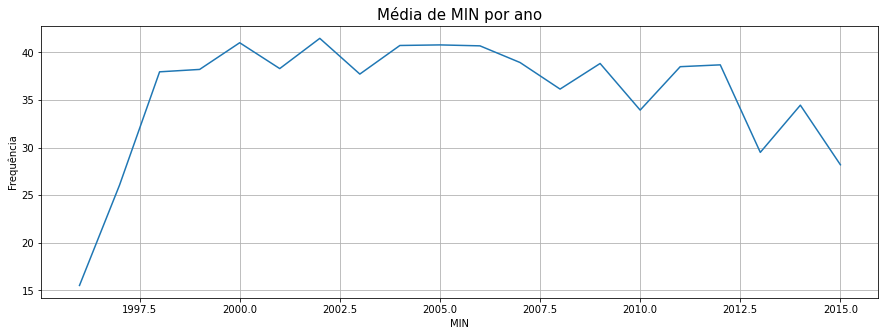

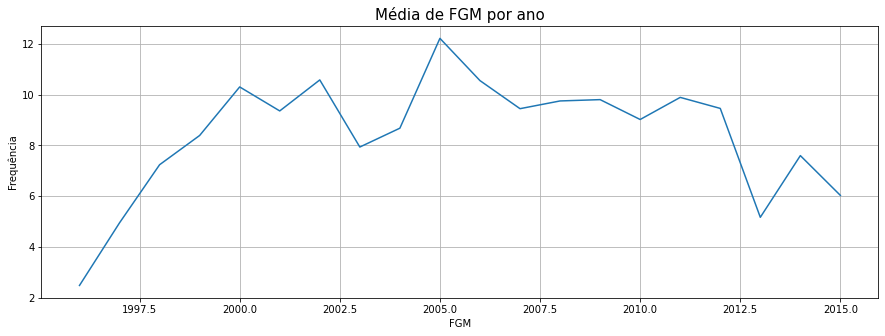

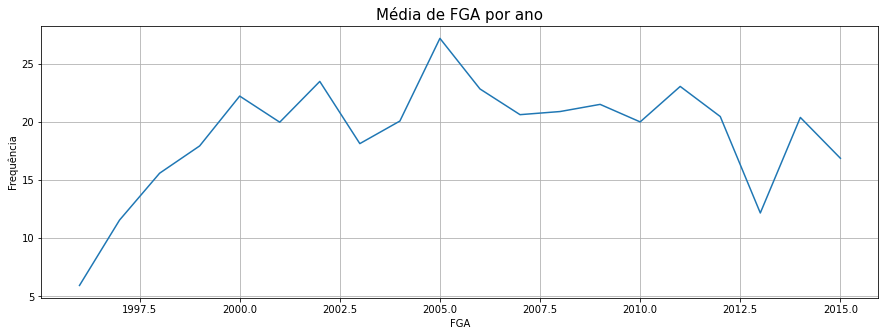

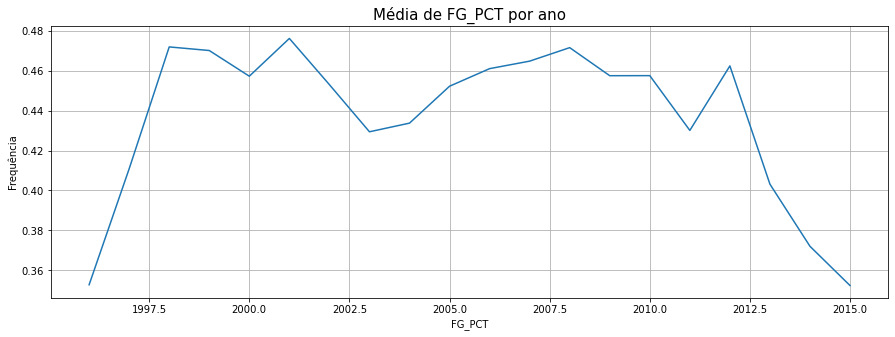

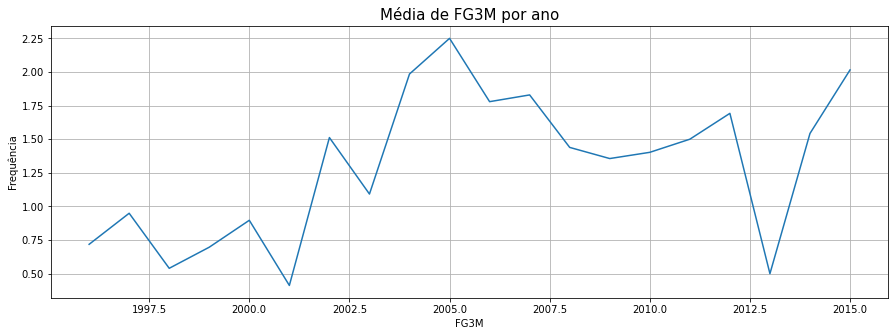

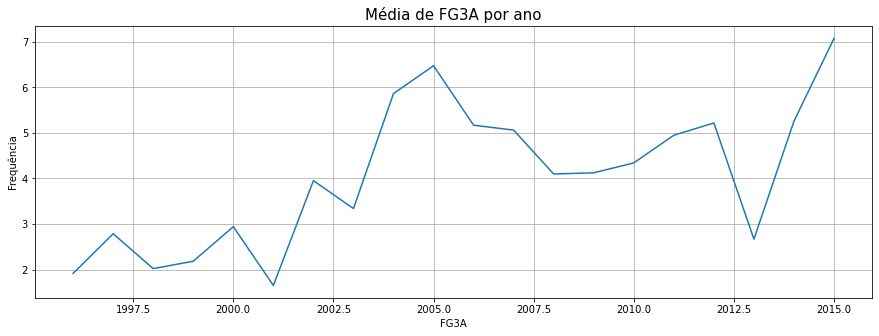

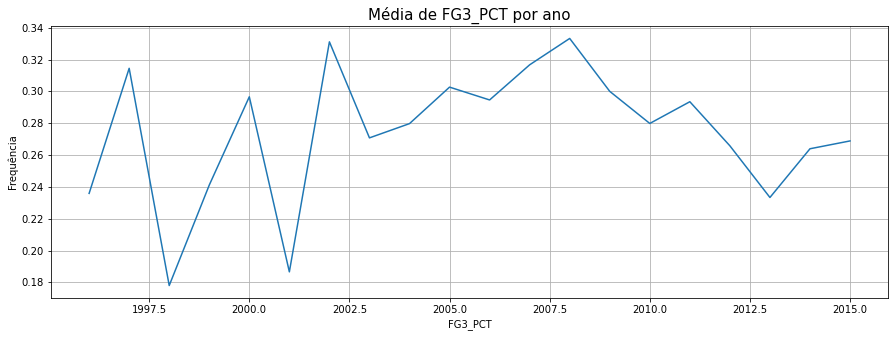

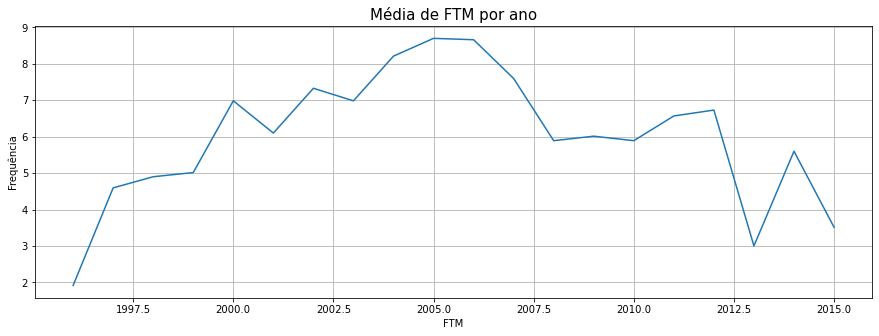

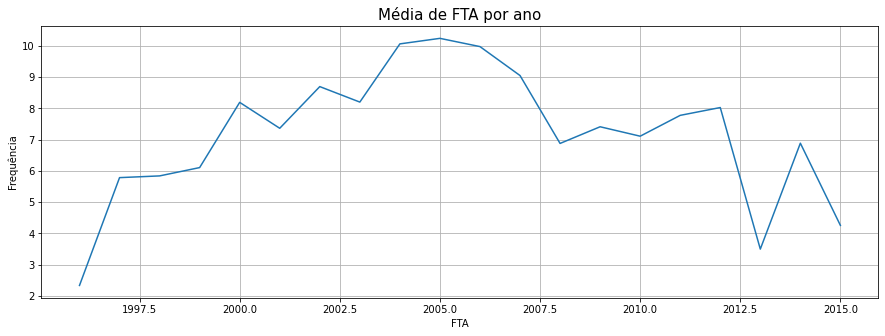

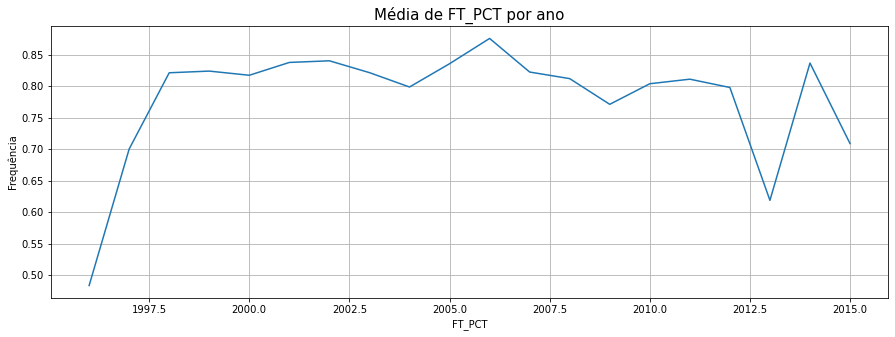

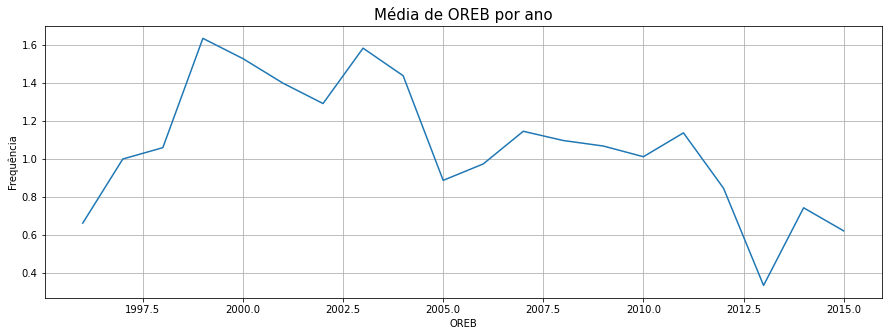

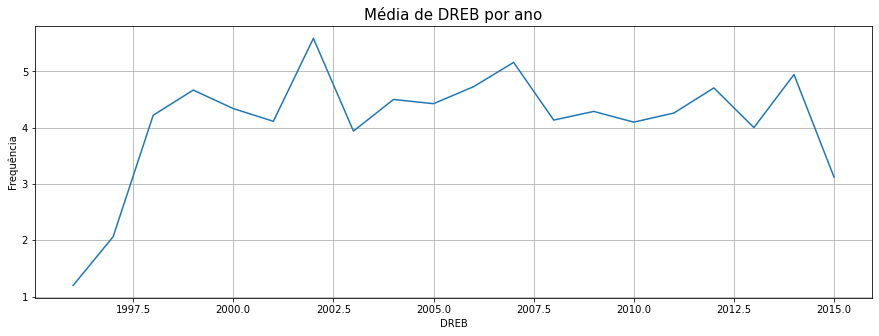

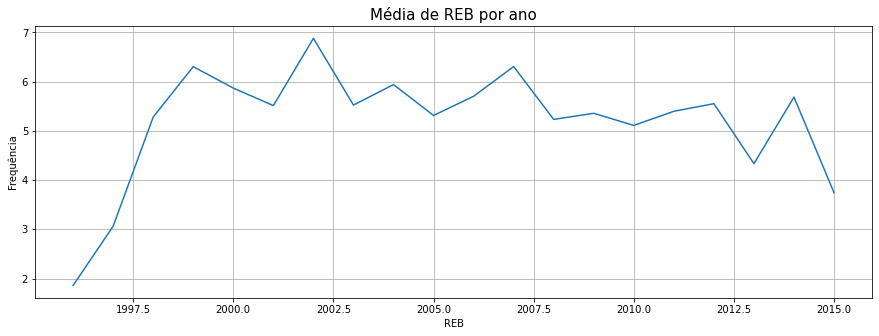

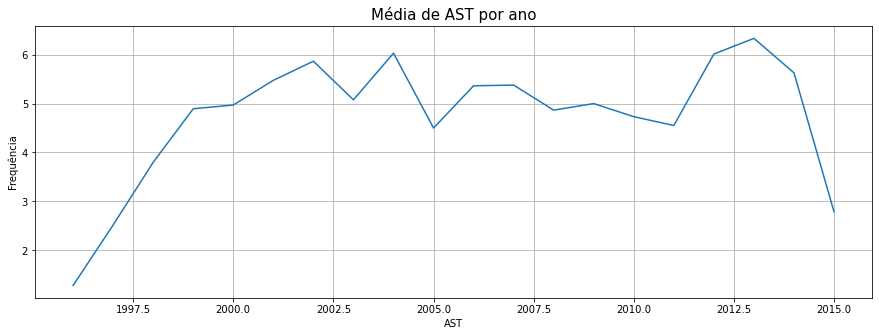

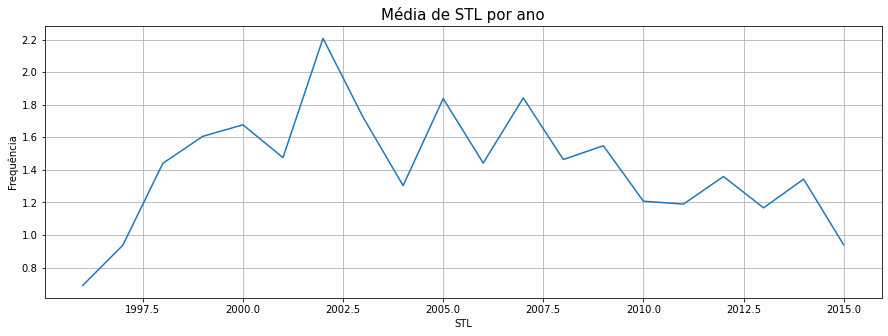

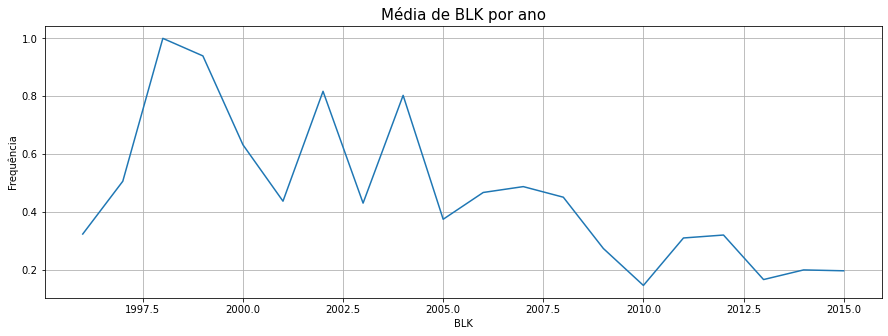

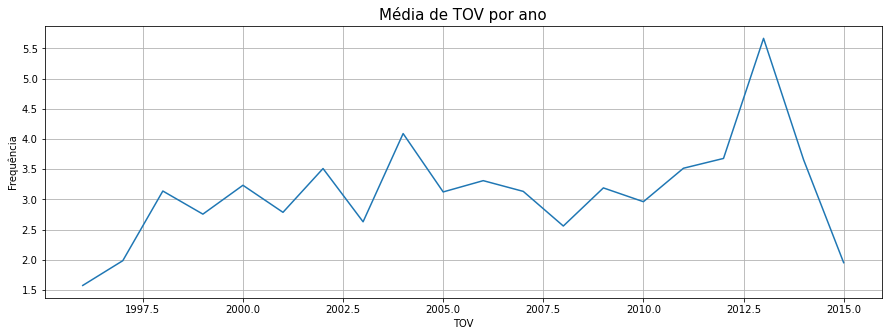

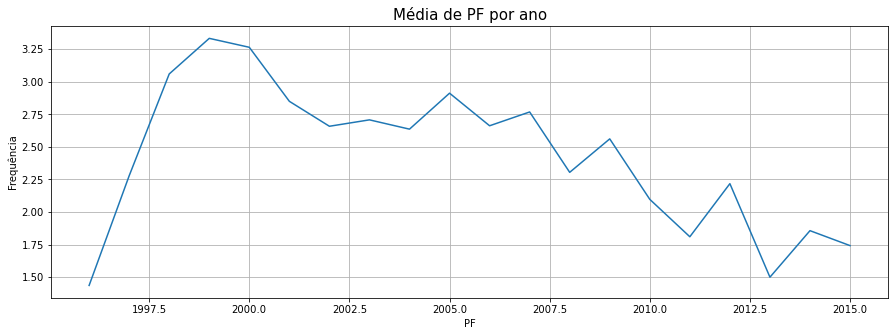

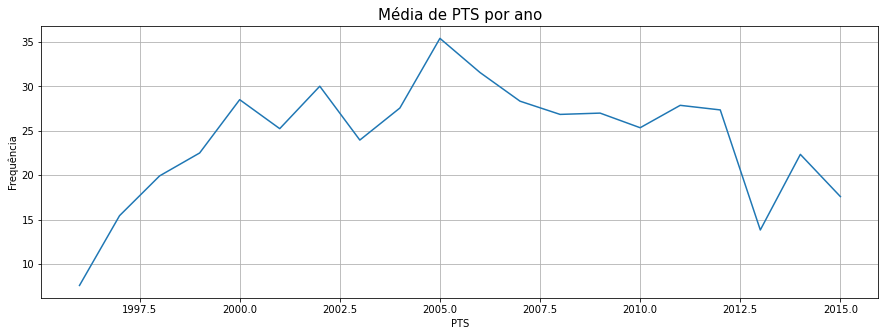

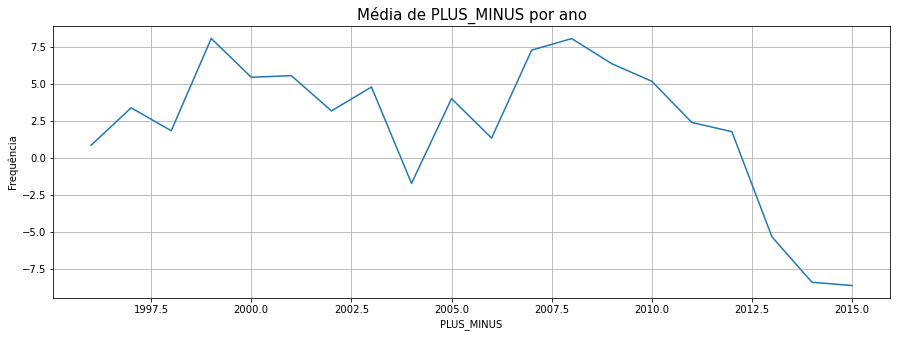

In [88]:
#Gráficos com o desempenho médio do Kobe Bryant com o passar dos anos
for col in cols:
    plt.figure(figsize=(15,5))
    plt.plot(media['YEAR'],media[col])
    plt.title(f'Média de {col} por ano', fontsize = 15)
    plt.ylabel("Frequência")
    plt.xlabel(col)
    plt.grid()
    plt.show()

### Nota-se:
    - Kobe Bryant teve uma evolução constante até o ano de 2005.
    - O ano de 2005 foi um dos melhores da carreira de Kobe. 
    - Depois de 2005 Kobe manteve estabilidade por cerca de 5 anos.
    - A partir de 2012 o desempenho passou a cair na maioria das médias. 

### Quantos arremeços ele realizou nos últimos segundos de cada período jogado, em todos os seus jogos.

In [89]:
from nba_api.stats.endpoints import shotchartdetail

In [90]:
#Aparentemente, todos os dados se referem a quando o Kobe jogava no time LAL.
kobe['MATCHUP'].unique()

array(['LAL vs. UTA', 'LAL @ OKC', 'LAL @ HOU', 'LAL @ NOP',
       'LAL vs. LAC', 'LAL @ LAC', 'LAL vs. BOS', 'LAL vs. MIA',
       'LAL @ UTA', 'LAL vs. WAS', 'LAL vs. DEN', 'LAL @ PHX',
       'LAL vs. MEM', 'LAL vs. NYK', 'LAL vs. CLE', 'LAL vs. GSW',
       'LAL @ DEN', 'LAL @ MEM', 'LAL @ MIL', 'LAL @ CHI', 'LAL vs. SAS',
       'LAL @ CLE', 'LAL @ IND', 'LAL @ SAS', 'LAL vs. MIN',
       'LAL vs. CHA', 'LAL vs. CHI', 'LAL @ POR', 'LAL vs. SAC',
       'LAL vs. HOU', 'LAL @ GSW', 'LAL vs. NOP', 'LAL vs. OKC',
       'LAL @ SAC', 'LAL @ BOS', 'LAL @ CHA', 'LAL vs. MIL', 'LAL @ MIN',
       'LAL @ TOR', 'LAL @ DET', 'LAL @ ATL', 'LAL @ WAS', 'LAL @ PHI',
       'LAL vs. IND', 'LAL vs. POR', 'LAL vs. TOR', 'LAL vs. DET',
       'LAL @ DAL', 'LAL @ NYK', 'LAL @ BKN', 'LAL vs. DAL',
       'LAL vs. PHX', 'LAL vs. NOH', 'LAL @ ORL', 'LAL @ NOH',
       'LAL vs. ATL', 'LAL @ MIA', 'LAL vs. PHI', 'LAL vs. ORL',
       'LAL vs. BKN', 'LAL vs. NJN', 'LAL @ NJN', 'LAL vs. SEA',
       'LAL 

In [91]:
#Criando df com as informações de arremeços do Kobe Bryant.
arremecos = shotchartdetail.ShotChartDetail(team_id = teams.loc[teams['abbreviation'] == 'LAL']['id'],
                                            player_id = kobe['Player_ID'].unique()[0],
                                            context_measure_simple = 'FGA')
arremecos = arremecos.get_data_frames()[0]
arremecos.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0020000012,10,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,10,27,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,18,167,72,1,0,20001031,POR,LAL
1,Shot Chart Detail,0020000012,12,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,10,22,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,15,-157,0,1,0,20001031,POR,LAL
2,Shot Chart Detail,0020000012,35,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,7,45,Made Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-101,135,1,1,20001031,POR,LAL
3,Shot Chart Detail,0020000012,43,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,6,52,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,22,138,175,1,0,20001031,POR,LAL
4,Shot Chart Detail,0020000012,155,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,6,19,Made Shot,Driving Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,1,20001031,POR,LAL


In [92]:
#Df somente com os arremeços feitos nos últimos 10 segundos do período
ult_sec = arremecos.loc[(arremecos['MINUTES_REMAINING'] == 0) & (arremecos['SECONDS_REMAINING'] < 11)]
ult_sec.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
16,Shot Chart Detail,0020000019,100,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,0,1,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,1,20001101,LAL,UTA
39,Shot Chart Detail,0020000047,202,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,0,4,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,27,-27,272,1,1,20001104,VAN,LAL
64,Shot Chart Detail,0020000049,369,977,Kobe Bryant,1610612747,Los Angeles Lakers,3,0,1,Made Shot,Running Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,12,121,26,1,1,20001105,LAL,LAC
74,Shot Chart Detail,0020000058,201,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,0,10,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,167,190,1,0,20001107,HOU,LAL
78,Shot Chart Detail,0020000058,306,977,Kobe Bryant,1610612747,Los Angeles Lakers,3,0,1,Missed Shot,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Left Side(L),8-16 ft.,8,-71,42,1,0,20001107,HOU,LAL


In [93]:
#Total de arremeços do Kobe Bryant nos últimos 10 segundos de cada período do jogo em todas as temporadas
ult_sec.groupby('PERIOD')['SECONDS_REMAINING'].count()

PERIOD
1    275
2    346
3    283
4    217
5     29
6      3
Name: SECONDS_REMAINING, dtype: int64

#### Exercício 2: Importe as bibliotecas necessárias para a realização de uma classificação do tipo `k-nearest neighbors` e carregue o arquivo `iris.csv`. Faça uma inspeção dos dados e então divida-os entre conjuntos de atributos descritivos e targets, lembrando-se de realizar a codificação dos mesmos, caso necessário.

In [14]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
%matplotlib inline

In [95]:
iris = pd.read_csv('iris.csv')

In [96]:
iris['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [97]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [98]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [99]:
#Conjunto de atributos descritivos
X = iris.drop('species', axis=1)

In [100]:
#Vetor de targets
target = preprocessing.LabelEncoder()
y = target.fit_transform(iris['species'])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Instancie o modelo de classificação k-NN e realize a validação cruzada para a captura dos melhores hiperparâmetros. Apresente um gráfico com os valores dos scores em função no número de vizinhos, considerando as margens de desvio padrão. Estude os valores médios e o desvio padrão de cada atributo descritivo.

In [101]:
#Gerando uma lista de dicionários para representar graficamente os valores de score da cv e de k_neighbors
scores = []
errors = {}

for i in range(1, 60, 5):
    model = knn(n_neighbors = i)
    cv_scores = cross_val_score(model, X, y, cv = 5)
    dict_scores = {'score_medio':np.mean(cv_scores), 'score_std':np.std(cv_scores), 'n_neighbours': i}
    scores.append(dict_scores)
    error = 1 - np.mean(cross_val_score(model, X, y, cv = 5))
    errors.update({i:error})    

#### Entendendo o for:
    - cv_scores recebe um array de 5 resultados, um para cada partição feita automaticamente pelo cv.  
    - dict_scores recebe um dicionário com o valor de n_neighbours, a média e o desvio padrão para cada iteração.   
    - Guarda cada valor na sua lista de dicionários 

In [102]:
#Média dos 5 resultados da validação cruzada para cada iteração.
errors

{1: 0.040000000000000036,
 6: 0.019999999999999907,
 11: 0.019999999999999907,
 16: 0.033333333333333215,
 21: 0.033333333333333215,
 26: 0.053333333333333455,
 31: 0.06666666666666676,
 36: 0.046666666666666634,
 41: 0.05999999999999994,
 46: 0.06666666666666665,
 51: 0.07999999999999985,
 56: 0.10666666666666669}

In [103]:
#Parâmetro n_neighbors com o menor erro, ou seja, o melhor valor para n_neighbors.
min(errors, key = errors.get)

6

In [104]:
#Gerando df da lista de dicionários
df_scores = pd.DataFrame(scores)
df_scores.head()

,score_medio,score_std,n_neighbours
0,0.960000,0.024944,1
1,0.980000,0.016330,6
2,0.980000,0.026667,11
3,0.966667,0.029814,16
4,0.966667,0.029814,21


In [105]:
#Definindo limite superior e inferior para plotar no gráfico
df_scores['limite_inf'] = df_scores['score_medio'] - df_scores['score_std']
df_scores['limite_sup'] = df_scores['score_medio'] + df_scores['score_std']

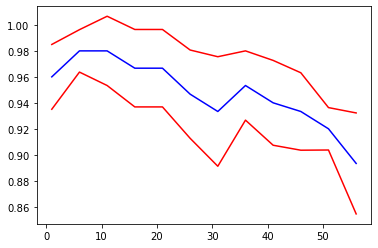

In [106]:
#Gráfico com os valores dos scores em função no número de vizinhos
plt.plot(df_scores['n_neighbours'],df_scores['limite_inf'], color = 'r')
plt.plot(df_scores['n_neighbours'],df_scores['score_medio'], color = 'b')
plt.plot(df_scores['n_neighbours'],df_scores['limite_sup'], color = 'r');

   - O melhor valor médio acontece com k_neighbors entre 6 e 11, como mostrado no dicionário errors, sendo o 6 melhor por uma diferença mínima.

#### Agora realize a padronização, repita o processo de captura do melhor hiperparâmetro e plote novamente o gráfico dos scores em função do número de vizinhos, discuta as diferenças para o caso sem padronização.

In [107]:
#Utilizando sklearn para padronizar o conjunto de atributos descritivos.
X = preprocessing.scale(X, axis = 0)

In [108]:
# Verificando se as colunas têm média = 0 e desvio = 1.
print('Média:',np.mean(X[:,1]))
print('Desvio Padrão:',np.std(X[:,1]))

Média: -7.815970093361102e-16
Desvio Padrão: 0.9999999999999999


In [109]:
#Repetindo a validação cruzada com os valores padronizados
scores_stand = []
errors_stand = {}

for i in range(1, 60, 5):
    model = knn(n_neighbors = i)
    cv_scores = cross_val_score(model, X, y, cv = 5)
    dict_scores = {'score_medio':np.mean(cv_scores), 'score_std':np.std(cv_scores), 'n_neighbours': i}
    scores_stand.append(dict_scores)
    error = 1 - np.mean(cross_val_score(model, X, y, cv = 5))
    errors_stand.update({i:error})    

In [110]:
errors_stand

{1: 0.053333333333333455,
 6: 0.033333333333333215,
 11: 0.053333333333333455,
 16: 0.06666666666666665,
 21: 0.053333333333333344,
 26: 0.06666666666666676,
 31: 0.07333333333333347,
 36: 0.09333333333333338,
 41: 0.11999999999999988,
 46: 0.1266666666666667,
 51: 0.14,
 56: 0.1333333333333332}

In [111]:
#Parâmetro n_neighbors com o menor erro, ou seja, o melhor valor para n_neighbors.
min(errors_stand, key = errors_stand.get)

6

In [112]:
df_stand = pd.DataFrame(scores_stand)
df_stand

,score_medio,score_std,n_neighbours
0,0.946667,0.033993,1
1,0.966667,0.036515,6
2,0.946667,0.033993,11
3,0.933333,0.047140,16
4,0.946667,0.040000,21
5,0.933333,0.042164,26
6,0.926667,0.048990,31
7,0.906667,0.038873,36
8,0.880000,0.033993,41
9,0.873333,0.048990,46


In [113]:
# Criar os limites para representação gráfica novamente
df_stand['limite_sup'] = df_stand['score_medio'] + df_stand['score_std']
df_stand['limite_inf'] = df_stand['score_medio'] - df_stand['score_std']

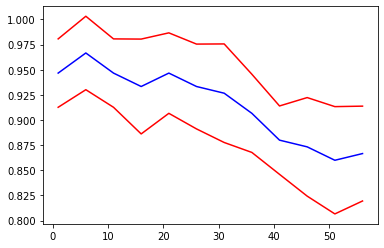

In [114]:
#Gráfico com os valores dos scores em função no número de vizinhos
plt.plot(df_stand['n_neighbours'],df_stand['limite_inf'],color = 'r')
plt.plot(df_stand['n_neighbours'],df_stand['score_medio'],color = 'b')
plt.plot(df_stand['n_neighbours'],df_stand['limite_sup'],color = 'r');

- Com os valores padronizados, ficou evidente ser o 6 o melhor valor para o hiperparâmentro n_neighbors.

#### Separe os dados em subconjuntos de treino e teste e treine o modelo. Instancie um novo modelo padronizado, levando em conta o melhor número de vizinhos, ajuste os dados e realize suas previsões. Ao fim, calcule a matriz de confusão e meça a acurácia de seus resultados.

In [137]:
#Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [138]:
#Instanciando o modelo com o melhor número de vizinhos, definido anteriormente.
model = knn(n_neighbors = 6)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [139]:
#Prevendo como o modelo performa com os dados de teste
y_pred = model.predict(X_test)

In [140]:
#Matriz de confusão
confusion_matrix(y_test, y_pred)

array([[18,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  4]], dtype=int64)

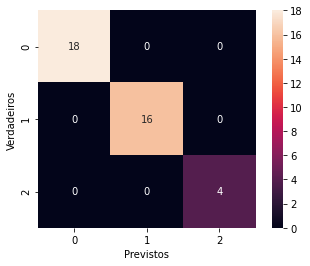

In [141]:
#Usando o heatmap para visualizar melhor a matriz de confusão
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred).T, square = True, annot = True, fmt = 'd', cbar = True)
plt.ylabel('Verdadeiros')
plt.xlabel('Previstos');

In [142]:
accuracy_score(y_test, y_pred)

1.0

- O modelo acertou em todas as previsões dos valores verdadeiros;
- Com isso, o modelo teve uma acurácio de 1 (100%);
- Deve ser levado em conta que o dataset Iris é bastante balanceado e com características diferentes de cada espécie de flor;
- Isso faz com que seja mais fácil do modelo prever os resultados;
- Na prática a teoria é outra :)

#### Exercício 3: Importe as bibliotecas necessárias para a realização de uma classificação do tipo `Logistic regression` e carregue o arquivo `cancer-prostate.csv`. Faça uma inspeção dos dados e então divida-os entre conjuntos de atributos descritivos e targets, lembrando-se de realizar a codificação dos mesmos, caso necessário.

In [13]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [144]:
cancer = pd.read_csv('cancer-prostate.csv')

In [145]:
cancer.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [146]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [147]:
cancer.shape

(100, 10)

In [148]:
#Excluindo a coluna ID 
cancer = cancer.drop('id', axis=1)

In [150]:
#Alterando os valores da variável target para 0 e 1 
cancer['diagnosis_result'][cancer['diagnosis_result'] == 'M'] = 1
cancer['diagnosis_result'][cancer['diagnosis_result'] == 'B'] = 0
cancer['diagnosis_result'] = cancer['diagnosis_result'].astype(int)

<ipython-input-150-3abe30c23c22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer['diagnosis_result'][cancer['diagnosis_result'] == 'M'] = 1
<ipython-input-150-3abe30c23c22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer['diagnosis_result'][cancer['diagnosis_result'] == 'B'] = 0


In [151]:
cancer.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059


#### Realize separação entre atributos descritivos e targets e faça a padronização dos dados, codificando os diagnósticos. Calcule uma matriz de correlação entre os atributos descritivos e a imprima em um mapa de calor. 

In [152]:
# Matriz de atributos descritivos padronizados
X = cancer.drop('diagnosis_result', axis=1)
X = preprocessing.scale(X, axis = 0)

In [153]:
# Vetor de targets
target = preprocessing.LabelEncoder()
y = target.fit_transform(cancer['diagnosis_result'])

<AxesSubplot:>

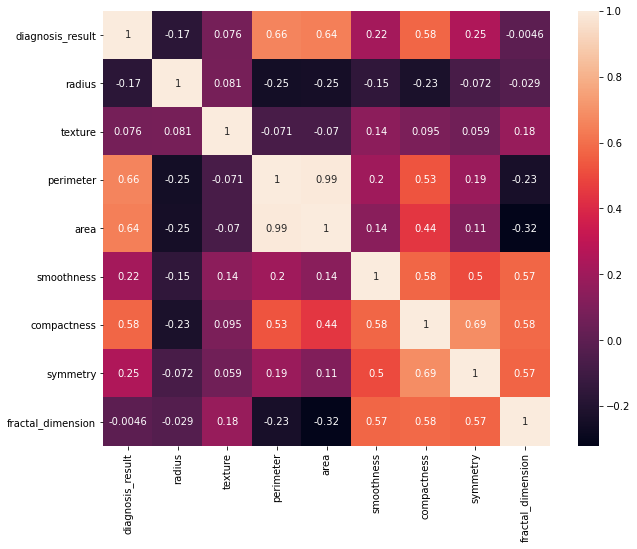

In [154]:
#Plotando a matriz de correlação com um mapa de calor. 
plt.subplots(figsize = (10, 8))
sns.heatmap(cancer.corr(method = 'spearman').iloc[0:len(cancer), 0:len(cancer)], annot = True)

#### Estabeleça uma estratégia para a validação cruzada e estude os dados de modelo, coeficientes e scores para diferentes quantidades de dobras.

In [246]:
X = cancer.drop('diagnosis_result', axis=1)
y = cancer['diagnosis_result']

In [247]:
from sklearn.model_selection import KFold

In [248]:
#Definindo o número de folds e instanciando o modelo. 
kf = KFold(n_splits = 10, shuffle = True, random_state = None)
logit = LogisticRegression(max_iter = 250)

In [249]:
#Criando as listas que vão receber valores preditos e métricas.
kf_y_preds = []
kf_coefs = []
kf_scores = []
kf_matrix = []

In [267]:
#Para cada fold (de 0 a 9) treina e modelo e append os preditos e métricas nas listas
for k, (train_index, test_index) in enumerate(kf.split(X)):    
    model = logit.fit(X.iloc[train_index], y[train_index])
    coefs = model.coef_
    y_preds = model.predict(X.iloc[test_index])
    scores = accuracy_score(y[test_index], y_preds)
    matrix = confusion_matrix(y[test_index], y_preds)
    
    kf_y_preds.append(y_preds)
    kf_coefs.append(coefs)
    kf_scores.append(scores)
    kf_matrix.append(matrix)
    
#Acurácia para cada fold    
    print("K", k, " = ", scores, sep = "")

K0 = 1.0
K1 = 0.6
K2 = 1.0
K3 = 0.6
K4 = 0.9
K5 = 1.0
K6 = 0.7
K7 = 0.6
K8 = 0.9
K9 = 0.8


- Os modelos com k_fold = 0, 2 e 5 tiveram os melhores resultados.

#### Exercício 4: Importe as bibliotecas necessárias para a realização de uma classificação do tipo `GaussianNB` e carregue o arquivo `diabetes.csv`. Faça uma inspeção dos dados e então divida-os entre conjuntos de atributos descritivos e targets, lembrando-se de realizar a codificação dos mesmos, caso necessário.

In [359]:
from sklearn.naive_bayes import GaussianNB

In [360]:
diabetes = pd.read_csv('diabetes.csv')

In [361]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


In [362]:
diabetes.shape

(995, 3)

In [363]:
diabetes.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


#### Separe o dataframe criado entre atributos descritivos e tagets e então separe-os em conjuntos de treino e teste. Submeta os dados de treino a um modelo Naive Bayes e ajuste os dados de treino. 

In [364]:
#Separando atributos descritivos e targets
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

In [376]:
#Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [377]:
#Instanciando e treinando o modelo
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

#### Realize as previsões e calcule a acurácia do modelo. Calcule também a matriz de confusão e a imprima em conjunto com um mapa de calor para inspeção visual. Calcule também a curva ROC e a área sob a curva AUC para seu modelo.

In [378]:
#Prevendo valores de target na base teste
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0], dtyp

In [380]:
#Acurácia do modelo comparando valores reais e preditos
acc = accuracy_score(y_test, y_pred)
acc

0.9464882943143813

In [382]:
#Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
cm

array([[132,   8],
       [  8, 151]], dtype=int64)

Text(0.5, 15.0, 'Previstos')

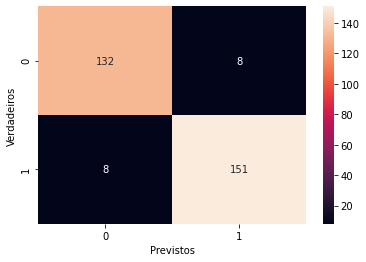

In [390]:
#Matriz de confusão com mapa de calor
sns.heatmap(cm.T, annot=True, fmt='d')
plt.ylabel("Verdadeiros")
plt.xlabel("Previstos")


In [393]:
#Visualização de precision e recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       140
           1       0.95      0.95      0.95       159

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



In [394]:
fpr_nb, tpr_nb, thr_nb = roc_curve(y_test, y_pred)

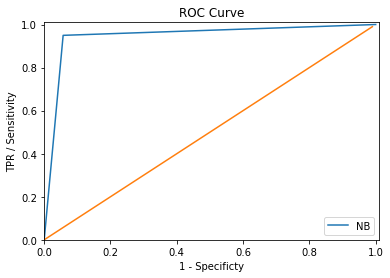

In [399]:
plt.axis([0, 1.01, 0, 1.01])

plt.plot(fpr_nb, tpr_nb)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))

plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.legend(['NB'])

plt.show() 

In [400]:
#Calculando a área sob a curva
print('AUC=', auc(fpr_nb, tpr_nb))

AUC= 0.9462713387241689


#### Exercício 5: Importe as bibliotecas necessárias para a realização de uma classificação do tipo `SVM` e carregue o arquivo `winequality-red.csv`. Faça uma inspeção dos dados e então divida-os entre conjuntos de atributos descritivos e targets, lembrando-se de realizar a codificação dos mesmos, caso necessário.

In [4]:
from sklearn.svm import SVC

In [5]:
wine = pd.read_csv('winequality-red.csv')

In [6]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
wine.shape

(1599, 12)

In [9]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### Realize os procedimentos de separação dos dados entre atributos descritivos e targets; Faça a separação destes entre subconjuntos de treino e teste e encontre a melhor função de Kernel para obter a maior acurácia possível para a previsão do nível de qualidade dos vinhos do dataset.

In [10]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=53)

In [56]:
svc = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
error_rates = {}

for c in svc:
        model_svc = SVC(kernel = 'linear',class_weight = 'balanced',   C = c)
        print (np.mean(cross_val_score(model_svc, X_train, y_train, cv = 5)),' C:', c)
        
        error = 1 - np.mean(cross_val_score(model_svc, X_train, y_train, cv = 5))
        error_rates.update({(c): error})

0.31855299860529984  C: 0.1
0.3427405857740585  C: 0.2
0.3444211994421199  C: 0.3
0.3410774058577406  C: 0.4
0.3519246861924686  C: 0.5
0.35442468619246864  C: 0.6
0.36443165969316593  C: 0.7
0.36443514644351466  C: 0.8
0.36526847977684807  C: 0.9
0.36694211994421205  C: 1


In [57]:
print(error_rates)
min(error_rates, key=error_rates.get)

{0.1: 0.6814470013947002, 0.2: 0.6572594142259415, 0.3: 0.6555788005578801, 0.4: 0.6589225941422594, 0.5: 0.6480753138075315, 0.6: 0.6455753138075313, 0.7: 0.6355683403068341, 0.8: 0.6355648535564853, 0.9: 0.6347315202231519, 1: 0.633057880055788}


1

In [75]:
best_model = SVC(C = min(error_rates, key=error_rates.get), kernel = 'linear')

In [76]:
best_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [77]:
y_pred = best_model.predict(X_test)

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        16
           5       0.69      0.78      0.73       173
           6       0.50      0.70      0.59       147
           7       0.00      0.00      0.00        55
           8       0.00      0.00      0.00         5

    accuracy                           0.59       400
   macro avg       0.20      0.25      0.22       400
weighted avg       0.48      0.59      0.53       400



C:\Users\rsoares\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
print(confusion_matrix(y_test, y_pred))

[[  0   0   3   1   0   0]
 [  0   0  11   5   0   0]
 [  0   0 135  38   0   0]
 [  0   0  44 103   0   0]
 [  0   0   3  52   0   0]
 [  0   0   0   5   0   0]]


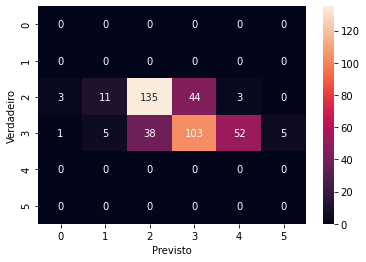

In [80]:
sns.heatmap(confusion_matrix(y_test, y_pred).T, annot = True, fmt = 'd')

plt.ylabel('Verdadeiro')
plt.xlabel('Previsto');

In [81]:
accuracy_score(y_test, y_pred)

0.595